In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind

## 1. Загрузка данных

**1.1 Прочитаем файлs "users_go.csv", "rides_go.csv", "subscriptions_go.csv" и сохраним их в переменные**

In [2]:
try:
    users_df = pd.read_csv('/datasets/users_go.csv')
    rides_df = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')
except FileNotFoundError:
    users_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Датасеты к проектам\Проект 4 «Статистический анализ данных»\users_go.csv")
    rides_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Датасеты к проектам\Проект 4 «Статистический анализ данных»\rides_go.csv")
    subscriptions_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Датасеты к проектам\Проект 4 «Статистический анализ данных»\subscriptions_go.csv")

**1.2 Выведем первые строки каждого набора данных и изучим общую информацию о каждом датафрейме**

In [3]:
# Выводим первые 5 строк датафрейма users_df
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
# Выводим общую информацию датафрейма users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
# Выводим первые 5 строк датафрейма rides_df
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
# Выводим общую информацию датафрейма rides_df
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
# Выводим первые 5 строк датафрейма subscriptions_df
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
# Выводим общую информацию датафрейма subscriptions_df
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод по первому шагу:**
- в датафрейме *usres_df* хранится информация о пользователях сервиса GoFast: уникальный идентификатор пользователя, имя пользователя, возраст, город, тип подписки (free, ultra).

- в датафрейме *rides_df* хранится информация о поездках в сервисе GoFast: уникальный идентификатор пользователя, расстояние, которое пользователь проехал в текущей сессии (в метрах), продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», дата совершения поездки.

- в датафрейме *subscriptions_df* хранится информация о подписках сервисе GoFast: тип подписки, стоимость одной минуты поездки по данной подписке, стоимость начала поездки, стоимость ежемесячного платежа.

## 2. Предобработка данных

**2.1 Приведём столбец *date* к типу даты pandas**

In [9]:
# Рассмотрим типы данных в датафрейме rides_df
rides_df.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [10]:
# Изменим тип данных столбца date на datetime64[ns]
rides_df["date"] = pd.to_datetime(rides_df["date"], format='%Y-%m-%d %H:%M')

In [11]:
# Проверим изменился тип данных для столбца date
rides_df.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

**2.2 Создадим новый столбец с номером месяца на основе столбца date**

In [12]:
# Извлекаем номер месяца и создаём новый столбец month
rides_df["month"] = rides_df["date"].dt.month

In [13]:
# Проверим на совпадение месяцев столбца month 
rides_df.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [14]:
min_date = rides_df["date"].min()
max_date = rides_df["date"].max()

# Выведем результат
print('Период данных:')
print(f"От: {min_date}")
print(f"До: {max_date}")

Период данных:
От: 2021-01-01 00:00:00
До: 2021-12-30 00:00:00


**2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах**

In [15]:
# Проверим количество пропусков в % датафрейма users_df
pd.DataFrame(round(users_df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


In [16]:
# Проверим количество пропусков в % датафрейма rides_df
pd.DataFrame(round(rides_df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000
month,0.000000


In [17]:
# Проверим количество пропусков в % датафрейма subscriptions_df
pd.DataFrame(round(subscriptions_df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
subscription_type,0.000000
minute_price,0.000000
start_ride_price,0.000000
subscription_fee,0.000000


In [18]:
# Выводим на экран количество строк-дубликатов в каждом из датафреймов
users_df.duplicated().sum(), rides_df.duplicated().sum(), subscriptions_df.duplicated().sum()

(31, 0, 0)

In [19]:
# Удаляем явные дубликаты датафрейма users_df
users_df = users_df.drop_duplicates()

In [20]:
# Убедимся что избавились от явных дубликатов
users_df.duplicated().sum(), rides_df.duplicated().sum(), subscriptions_df.duplicated().sum()

(0, 0, 0)

**Вывод по второму шагу:**

Во втором шаге были выполнены следующие задачи: 
- изменения типа данных столбца *date* из типа object на тип datetime64[ns];
- создание нового столбца *month*, в котором хранится информация месяца на основе столбца *date*;
- проверка датафреймов на наличие прорпущенных значений - 0, дубликатов - 31 в датафрейме users_df и удаление дубликатов.

## 3. Исследовательский анализ данных

**3.1 Опишем и визуализируем частоту встречаемости городов**

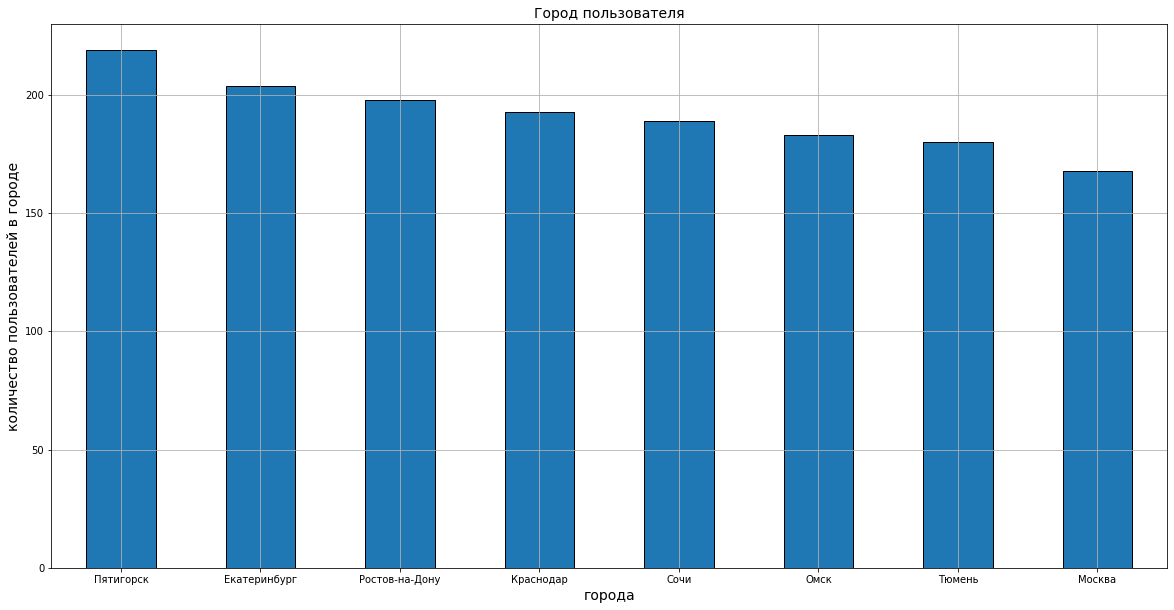

In [21]:
# Построим столбчатую диаграмму по убыванию, отображающую город пользователя
counts = users_df["city"].value_counts()
counts.plot(kind="bar", grid=True, edgecolor='black', figsize=(20, 10))
plt.xticks(rotation=0)
plt.title("Город пользователя", fontsize=14)
plt.xlabel("города", fontsize=14)
plt.ylabel("количество пользователей в городе", fontsize=14)
plt.show()

**Опишем город пользователя:**

Данные отображают количество пользователей в каждом из перечисленных городов. Пятигорск имеет 219 пользователей, Екатеринбург - 204 пользователей, Ростов-на-Дону - 198 пользователей, Краснодар - 193 пользователей, Сочи - 189 пользователей, Омск - 183 пользователей, Тюмень - 180 пользователей, Москва - 168 пользователей.

**3.2 Опишем и визуализируем соотношение пользователей с подпиской и без подписки**

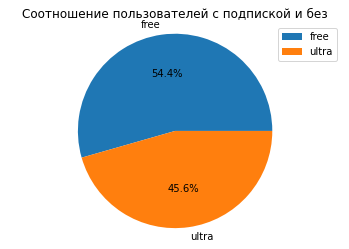

In [22]:
subscription_counts = users_df["subscription_type"].value_counts()
subscription_percentages = subscription_counts / subscription_counts.sum() * 100

plt.pie(subscription_percentages, labels=subscription_percentages.keys(), autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='best')
plt.title('Соотношение пользователей с подпиской и без')
plt.show()

**Опишем тип подписки в датафрейме users_df, который представлен двумя значениями: "free" и "ultra":**

Количество пользователей с бесплатной подпиской составляет 835 человек, тогда как количество пользователей с подпиской "ultra" равно 699.

**3.3 Опишем и визуализируем возраст пользователей**

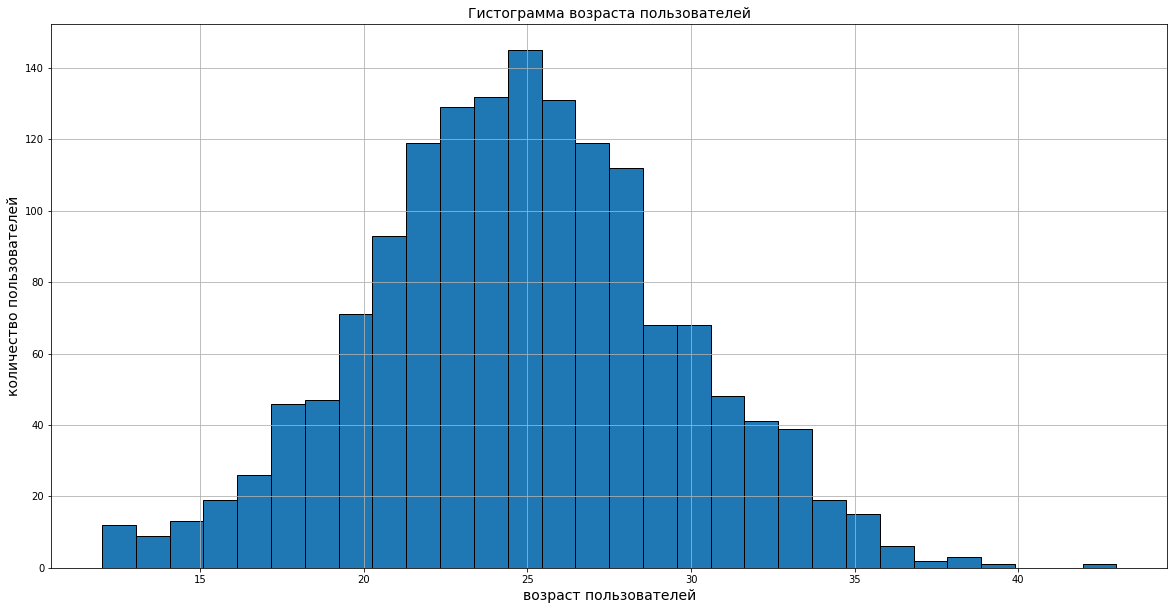

In [23]:
# Построим столбчатую диаграмму по убыванию, отображающую возраст пользователей
plt.figure(figsize=(20, 10))
plt.hist(users_df["age"], bins=30, edgecolor='black')
plt.xlabel("возраст пользователей", fontsize=14)
plt.ylabel("количество пользователей", fontsize=14)
plt.title("Гистограмма возраста пользователей", fontsize=14)
plt.grid(True)
plt.show()

**Опишем информацию о возрасте пользователей сервиса GoFfast:**

- В выборке присутствуют пользователи различных возрастов от 12 до 43 лет.
- Наибольшее количество пользователей (145) имеют возраст 25 лет, за которым следуют возраста 24 (132), 26 (131), 23 (129) и 27 (119) лет.
- Наименьшее количество пользователей (1) имеют возраст 39 и 43 лет.
- Пользователи в возрасте от 20 до 29 лет составляют значительную часть выборки, примерно 30% от общего количества пользователей.
- Можно сказать, что выборка достаточно равномерно распределена по возрастам, но есть легкое снижение количества пользователей после 30 лет.

Цифры, представленные выше могут служить дополнительной информацией для анализа аудитории и разработки маркетинговых стратегий, предлагая более целевые подходы к разным возрастным группам пользователей.

**3.4 Опишем и визуализируем расстояние, которое пользователь преодолел за одну поездку**

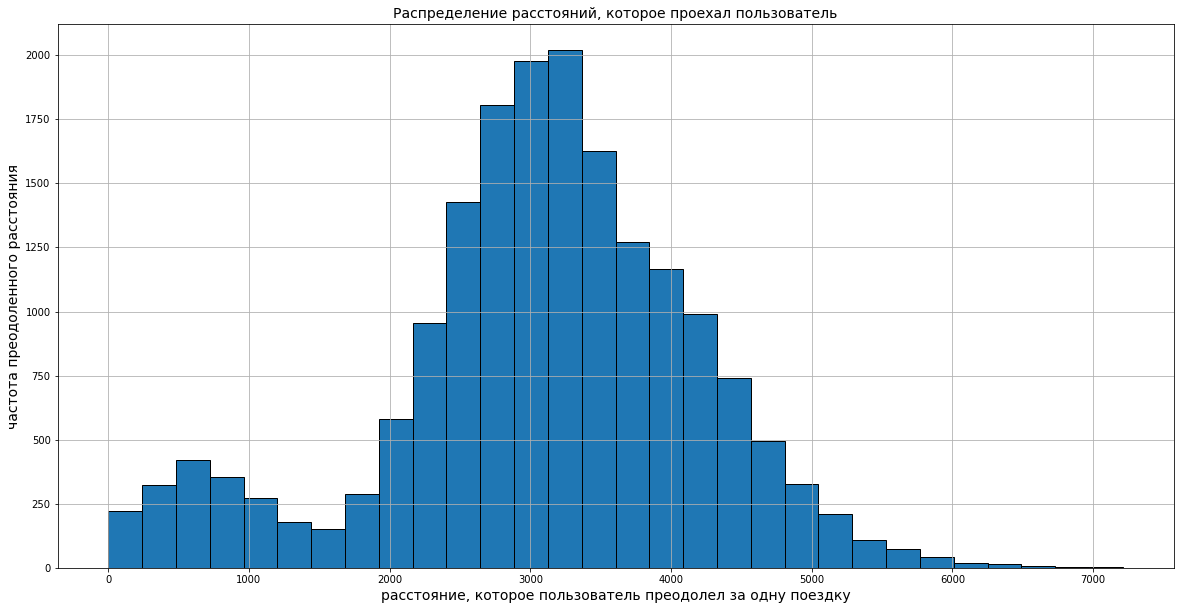

In [24]:
plt.figure(figsize=(20, 10))
plt.hist(rides_df["distance"], bins=30, edgecolor='black')
plt.xlabel("расстояние, которое пользователь преодолел за одну поездку", fontsize=14)
plt.ylabel("частота преодоленного расстояния", fontsize=14)
plt.title("Распределение расстояний, которое проехал пользователь", fontsize=14)
plt.grid(True)
plt.show()

**Опишем данные о расстоянии преодоленном пользователем за одну поездку:**

Из предоставленной информации видно, что наиболее часто встречающееся расстояние, которое пользователь преодолевает за одну поездку, в 3 километра. Второе по популярности расстояние - 2 километра. За одну поездку также часто встречается на расстояниях 4, меньше 1, 5 километров. Менее популярными являются поездки на расстояниях 6 и 7 километров.

**3.4 Опишем и визуализируем продолжительность поездок**

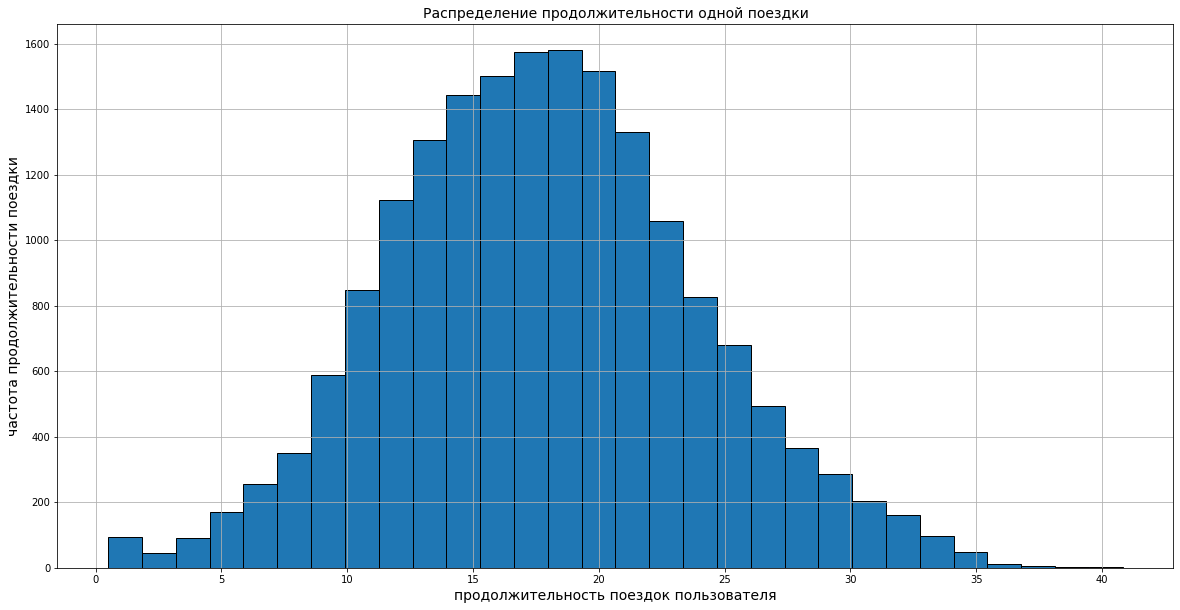

In [25]:
plt.figure(figsize=(20, 10))
plt.hist(rides_df["duration"], bins=30, edgecolor='black')
plt.xlabel("продолжительность поездок пользователя", fontsize=14)
plt.ylabel("частота продолжительности поездки", fontsize=14)
plt.title("Распределение продолжительности одной поездки", fontsize=14)
plt.grid(True)
plt.show()

**Опишем данные о продолжительности поездок:**

Смотря на график можно увидеть, что большинство поездок (5721) имеют продолжительность от 15 до 20 минут. Затем идут поездки длительностью от 10 до 15 минут (4374) и от 20 до 25 минут (4140). Небольшое количество поездок (1651) продолжительностью от 25 до 30 минут. Есть также 1639 поездок, которые длились менее 10 минут. Несколько меньше поездок (515) продолжительностью от 30 до 35 минут. Менее распространенные случаи - поездки от 35 до 40 минут (27) и от 40 до 45 минут (1).

**Выводы по третьему шагу:**

- после построения графика отображающего частоту встречаемости городов можно сделать вывод, что чаще всего встречается Пятигорск(219), а меньше всего Москва(168);
- после построения графика отображающего пользователей с подпиской и без можно сделать вывод, что сервисом без подписки пользуются 835 человек и 699 подпиской соответсвенно;
- после построения графика отображающего возраст пользователей можно сделать вывод, что наибольшее количество пользователей это люди возрастом 25 лет (145 человек), а также с возрастами 24 (132 человека), 26 (131 человек) и 23 (129 человек). После 27 лет наблюдается уменьшение количества пользователей по возрасту;
- после построения графика отображающего расстояние, которое пользователь преодолел за одну поездку можно сделать вывод, что пользователи сервиса GoFast часто пользуются для коротких поездок на расстоянии от 1 до 4 км;
- после построения графика отображающего продолжительность поездок можно сделать вывод, что продолжительность большинства поездок достаточно короткая, с пиком в диапазоне от 15 до 20 минут.

## 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [26]:
# Создадим новый датафрейм merged_df, в котором будут хранится данные о пользователях, поездках и подписках
merged_df = users_df.merge(
    rides_df, how='inner', on='user_id').merge(
    subscriptions_df, how='left', on='subscription_type')
merged_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [27]:
len(merged_df), len(rides_df), len(users_df), len(subscriptions_df)

(18068, 18068, 1534, 2)

**4.2 Создадим ещё два датафрейма, c данными о пользователях с подпиской и без неё**

In [28]:
# Создаём новый датафрейм, в котором будут хранится данные о пользователях без подписки
users_without_subscription_df = merged_df.loc[merged_df['subscription_type'] == "free"]
users_without_subscription_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
# Создаём новый датафрейм, в котором будут хранится данные о пользователях с подпиской
users_with_subscription_df = merged_df.loc[merged_df['subscription_type'] == "ultra"]
users_with_subscription_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


**4.3 Визуализируем и опишем информацию о расстоянии и времени поездок для пользователей обеих категорий**

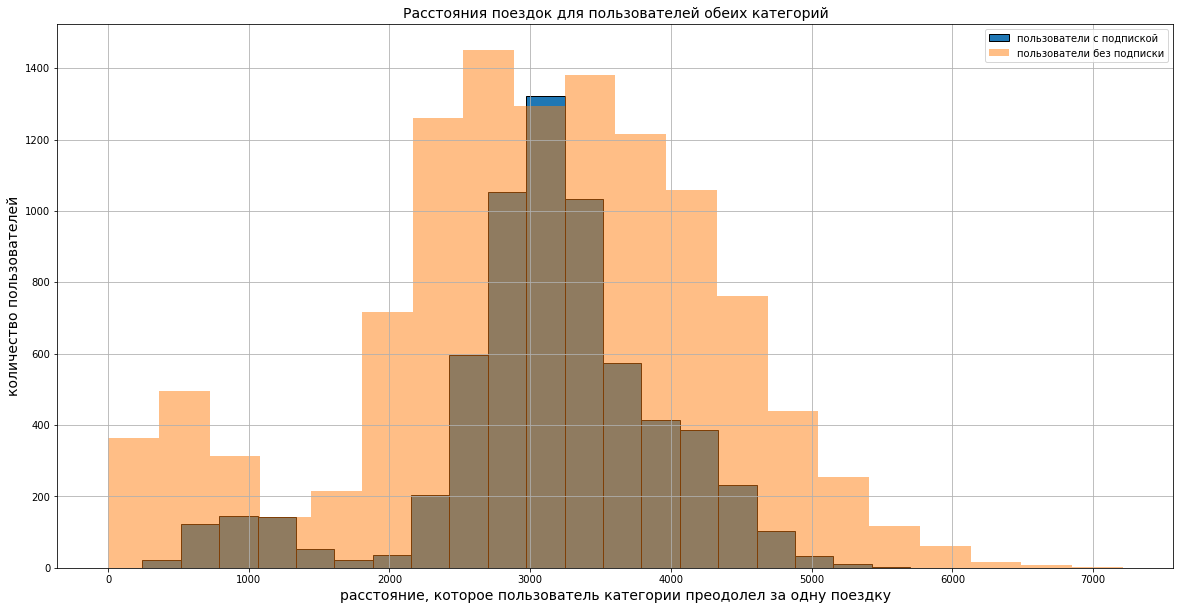

In [30]:
plt.figure(figsize=(20, 10))
plt.hist(users_with_subscription_df["distance"], bins=20, edgecolor='black', alpha=1, label='пользователи с подпиской')
plt.hist(users_without_subscription_df["distance"], bins=20, alpha=0.5, label='пользователи без подписки')
plt.xlabel('расстояние, которое пользователь категории преодолел за одну поездку', fontsize=14)
plt.ylabel('количество пользователей', fontsize=14)
plt.title('Расстояния поездок для пользователей обеих категорий', fontsize=14)
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

Опишем данные о **расстоянии** преодоленном пользователем **без подписки** за одну поездку:

1. Большинство поездок (примерно 31,7%) имеют расстояние примерно 3 км.
2. За ними следуют поездки примерно на расстояние 2 км (31%).
3. Примерно 18% поездок составляют расстояние около 4 км.
4. Примерно 9,6% поездок имеют очень короткое расстояние менее 1 км.
5. Всего 4,2% поездок составляют 1 км.
6. Доля поездок дальше 5 км составляет менее 2% от общего числа поездок.

В целом, можно сказать, что большинство пользователей без подписки преодолевает расстояние около 2-3 км за одну поездку. Есть небольшое количество поездок на более дальние расстояния до 7 км. 

Опишем данные о **расстоянии** преодоленном пользователем **с подпиской** за одну поездку::

1. Большинство пользователей с подпиской преодолели расстояние от 3 км за одну поездку. Их количество составляет 3091 человек.
2. Затем идут пользователи, которые преодолели расстояние от 2 км за одну поездку. Их количество составляет 2017 человек.
3. В то же время, 850 пользователей с подпиской преодолели расстояние от 4 км за одну поездку.
4. Также встречаются пользователи, которые преодолели расстояние менее 1 км или 1 км за одну поездку. Их количество соответственно составляет 259 и 252 человека.
5. Наименьшее количество пользователей с подпиской преодолели расстояние от 5 км за одну поездку. Их количество составляет всего 23 человека.

Таким образом, большинство пользователей с подпиской совершают поездки на расстояниях от 2 до 4 км, причем наибольшее количество поездок приходится на расстояние 3 км.

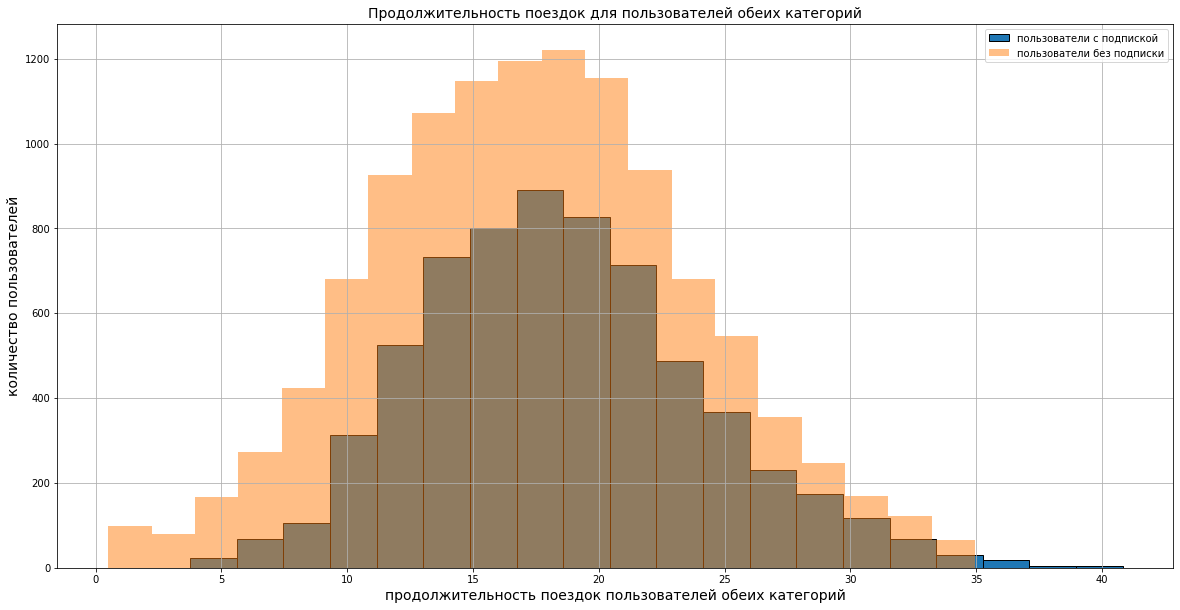

In [31]:
plt.figure(figsize=(20, 10))
plt.hist(users_with_subscription_df["duration"], bins=20, edgecolor='black', alpha=1, label='пользователи с подпиской')
plt.hist(users_without_subscription_df["duration"], bins=20, alpha=0.5, label='пользователи без подписки')
plt.xlabel('продолжительность поездок пользователей обеих категорий', fontsize=14)
plt.ylabel('количество пользователей', fontsize=14)
plt.title('Продолжительность поездок для пользователей обеих категорий', fontsize=14)
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

Опишем данные о **продолжительности поездок** для пользователей **без подписки**:

1. Большинство поездок (примерно 32%) имеют продолжительность от 15 до 20 минут.
2. За ними следуют поездки продолжительностью от 10 до 15 минут (26,5%) и от 20 до 25 минут (23,6%).
3. Продолжительность поездок менее 10 минут составляет около 8% от общего числа поездок.
4. Продолжительность поездок от 25 до 30 минут составляет около 6% от общего числа поездок.
5. Поездки длительностью от 30 до 35 минут составляют около 2% от общего числа поездок.

В целом, можно сказать, что большинство пользователей без подписки совершают поездки с продолжительностью от 15 до 20 минут. Однако, также есть значительное количество поездок с другими продолжительностями, начиная от 10 минут до 30 минут.

Опишем данные о **продолжительности поездок** для пользователей **с подпиской**:

1. Большинство поездок (примерно 34%) имеют продолжительность от 15 до 20 минут.
2. За ними следуют поездки продолжительностью от 20 до 25 минут (24,2%) и от 10 до 15 минут (23,1%).
3. Продолжительность поездок менее 10 минут составляет около 5% от общего числа поездок.
4. Продолжительность поездок от 25 до 30 минут составляет около 2,6% от общего числа поездок.
5. Поездки длительностью от 30 до 35 минут составляют около 1,7% от общего числа поездок.

В целом, можно сказать, что пользователи с подпиской также чаще всего совершают поездки с продолжительностью от 15 до 20 минут. Однако, здесь доля таких поездок немного выше, чем у пользователей без подписки. Также схоже распределение продолжительности поездок от 10 до 25 минут. Но при этом, пользователи с подпиской более активно пользуются самокатами длительностью более 25 минут, чего нет у пользователей без подписки. 

**Выводы по четвёртому шагу:**

1. Объединены данные о пользователях, поездках и подписках в один датафрейм(merged_df);
2. Созданы ещё два датафрейма из датафрейма(merged_df):
    - c данными о пользователях без подписки(users_without_subscription_df);
    - с данными о пользователях с подпиской(users_with_subscription_df).
3. Визуализирована и описана информация о расстоянии и времени поездок для пользователей обеих категорий.

Продолжительность поездок у пользователей с подпиской и без подписки примерно одинакова и в большинстве случаев составляет от 15 до 20 минут. Однако, пользователи без подписки проезжают более дальние расстояния в сравнении с пользователями с подпиской. Эти данные могут помочь определить поведение пользователей и принять решения о разработке различных тарифных планов или предложений.

## 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках**

In [32]:
# Округляем продолжительность поездки
merged_df['duration'] = np.ceil(rides_df['duration'])

# Создаём сводную таблицу с агрегированными данными
agg_df = merged_df.pivot_table(index=['user_id', "month", "subscription_type"], values=['distance', 'duration'], 
                               aggfunc={'distance': 'sum', 'duration': ['count', 'sum']})

# Переименуем столбцы
agg_df.columns = ['sum_distance', 'count_trips', 'sum_duration']

# Сбросим индекс
agg_df = agg_df.reset_index()

# Выводим датафрейм agg_df на экран
agg_df

,user_id,month,subscription_type,sum_distance,count_trips,sum_duration
0,1,1,ultra,7027.511294,2,42.0
1,1,4,ultra,754.159807,1,7.0
2,1,8,ultra,6723.470560,2,46.0
3,1,10,ultra,5809.911100,2,32.0
4,1,11,ultra,7003.499363,3,56.0
...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,2,26.0
11327,1534,8,free,7622.453034,2,48.0
11328,1534,9,free,4928.173852,1,23.0
11329,1534,11,free,13350.015305,4,78.0


**5.2 Добавим столбец с помесячной выручкой, которую принёс каждый пользователь**

In [33]:
# Создание функции для расчета стоимости поездки
def calculate_revenue(row):
    if row['subscription_type'] == 'free':
        duration = (row['sum_duration'])
        start_cost = 50
        minute_cost = 8
        revenue_without_subscription = (start_cost * row['count_trips']) + (duration * minute_cost)
        return revenue_without_subscription
    else:
        duration = (row['sum_duration'])
        start_cost = 0
        subscription_fee = 199
        minute_cost = 6
    revenue_with_subscription = subscription_fee + (duration * minute_cost)
    return revenue_with_subscription

# Добавляем столбец с помесячной выручкой
agg_df['monthly_revenue'] = agg_df.apply(calculate_revenue, axis=1)

# Выводим датафрейм agg_df на экран
agg_df

,user_id,month,subscription_type,sum_distance,count_trips,sum_duration,monthly_revenue
0,1,1,ultra,7027.511294,2,42.0,451.0
1,1,4,ultra,754.159807,1,7.0,241.0
2,1,8,ultra,6723.470560,2,46.0,475.0
3,1,10,ultra,5809.911100,2,32.0,391.0
4,1,11,ultra,7003.499363,3,56.0,535.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,2,26.0,308.0
11327,1534,8,free,7622.453034,2,48.0,484.0
11328,1534,9,free,4928.173852,1,23.0,234.0
11329,1534,11,free,13350.015305,4,78.0,824.0


**Выводы по пятому шагу:**

1. Создан новый датафрейм(agg_df) с агрегированными данными о поездках;
2. Был добавлен новый столбец *monthly_revenue*, в котором хранится информация о помесячной выручке, которую принёс каждый пользователь(с подпиской и без);
3. Посчитана выручка в месяц от пользователей с подпиской и без подписки, также посчитано количество пользователей с подпиской и без неё.

## 6. Проверка гипотез

**6.1 Тратят ли пользователи с подпиской больше времени на поездки?**

Нулевая гипотеза **(H₀)**: Пользователи с подпиской и пользователи без подписки тратят одинаковое количество времени на поездки.

Альтернативная гипотеза **(H₁)**: Пользователи с подпиской тратят больше времени на поездки по сравнению с пользователями без подписки.

In [34]:
# Создание двух независимых выборок из данных
users_without_subscription = merged_df[merged_df['subscription_type'] == "ultra"]['duration']
users_with_subscription = merged_df[merged_df['subscription_type'] == "free"]['duration']

# Проводим одновыборочный t-тест
result = ttest_ind(users_without_subscription, users_with_subscription, alternative='greater')

# Проверяем достигаемый уровень значимости
alpha = 0.05

print('среднее значение продолжительности поездок пользователей без подписки:'
      , merged_df[merged_df['subscription_type'] == "free"]['duration'].mean())
print('среднее значение продолжительности поездок пользователей с подпиской:'
      , merged_df[merged_df['subscription_type'] == "ultra"]['duration'].mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Разница статистически значима. Пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Нет статистически значимой разницы. Пользователи с подпиской не тратят больше времени на поездки.")

среднее значение продолжительности поездок пользователей без подписки: 17.890992392807746
среднее значение продолжительности поездок пользователей с подпиской: 19.037692307692307
p-значение: 2.495945372073663e-34
Разница статистически значима. Пользователи с подпиской тратят больше времени на поездки.


**6.2 Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку < 3130 метров?**

Нулевая гипотеза **(H₀)**: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Альтернативная гипотеза **(H₁)**: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [35]:
# Выделяем выборку с расстояниями одной поездки для пользователей с подпиской
data = merged_df.loc[merged_df['subscription_type'] == 'ultra', 'distance']

# Задаем гипотезу H0: среднее расстояние = 3130 метров
h0_mean_distance = 3130

# Проводим одновыборочный t-тест
result = st.ttest_1samp(data, h0_mean_distance, alternative='greater')

# Проверяем достигаемый уровень значимости
alpha = 0.05

print('среднее значение дальности поездок пользователей с подпиской:'
      , merged_df[merged_df['subscription_type'] == "ultra"]['distance'].mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние > 3130 метров")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров")

среднее значение дальности поездок пользователей с подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров


**6.3 Помесячная выручка от пользователей с подпиской по месяцам > чем выручка от пользователей без подписки?**

Нулевая гипотеза **(H₀)**:: Нет статистически значимой разницы в выручке от пользователей с подпиской и без подписки.

Альтернативная гипотеза  **(H₁)**: Есть статистически значимая разница в выручке от пользователей с подпиской и без подписки.

In [36]:
# Создание двух независимых выборок из данных
users_without_subscription = agg_df[agg_df['subscription_type'] == 'free']['monthly_revenue']
users_with_subscription = agg_df[agg_df['subscription_type'] == 'ultra']['monthly_revenue']

# Проведение t-теста
result = st.ttest_ind(users_with_subscription, users_without_subscription, alternative='greater')

# Проверяем достигаемый уровень значимости
alpha = 0.05

print('средние значения выручки пользователей без подписки:'
      , agg_df[agg_df['subscription_type'] == "free"]['monthly_revenue'].mean())
print('средние значения выручки пользователей с подпиской:'
      , agg_df[agg_df['subscription_type'] == "ultra"]['monthly_revenue'].mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Есть статистически значимая разница в выручке от пользователей с подпиской и без подписки.")
else:
    print("Нет статистически значимой разницы в выручке от пользователей с подпиской и без подписки.")

средние значения выручки пользователей без подписки: 328.6413651073845
средние значения выручки пользователей с подпиской: 362.7921906022502
p-значение: 1.8850394384715216e-31
Есть статистически значимая разница в выручке от пользователей с подпиской и без подписки.


**Выводы по шестому шагу:**

Из проведенных тестов можно сделать следующие выводы:

1. Пользователи с подпиской проводят больше времени на поездках по сравнению с пользователями без подписки.
2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальное значение износа самоката.
3. Есть статистически значимая разница в выручке от пользователей с подпиской и без подписки.
4. Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов следует использовать t-тест для связанных выборок.

Таким образом, можно заключить, что пользователи с подпиской являются более выгодными для сервиса, проводят более длительные поездки и приносят больше выручки. Также, после обновления серверов, ожидается снижение количества обращений в техподдержку.

## Общий вывод

В результате проведенного исследования были выявлены основные факторы, влияющие на выручку сервиса GoFast. 

В ходе исследования были выполнены следующие действия:
1. Подготовлено окружение для анализа данных путем импортирования нужных библиотек.
2. Загружены данные из файла и произведен основной анализ их характеристик.
3. Выполнены необходимые преобразования данных, включая изменение типов, добавление новых столбцов и обработку пропущенных значений.
4. Исследована информация о пользователях и поездках, а также проанализированы частота встречаемости городов, соотношение подписанных и неподписанных пользователей, а также анализ возраста, продолжительности и расстояния поездок.
5. Данные о пользователях, поездках и подписках объединены в одной таблице, также были созданы отдельные таблицы для подписанных и неподписанных пользователей.
6. Проведена визуализация данных о времени и расстоянии поездок для обеих категорий пользователей.
7. Вычислена общая выручка на основе сагрегированных данных о поездках и добавлен столбец с ежемесячной выручкой.
8. Проверены несколько гипотез, связанных с временем, расстоянием и выручкой от поездок пользователей с подпиской и без подписки.
9. Основываясь на полученных результатах исследования, сделаны выводы.

Выручка от услуг сервиса GoFast зависит от различных факторов, включая категорию пользователей, их предпочтения и поведение. Анализ данных показал, что пользователи с подпиской осуществляют больше поездок, имеют большую продолжительность и длину поездок, а также приносят большую выручку по сравнению с пользователями без подписки.

**В ходе проведенного исследования были проверены следующие гипотезы:**

**6.1 Тратят ли пользователи с подпиской больше времени на поездки?**

**6.2 Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку < 3130 метров?**

**6.3 Помесячная выручка от пользователей с подпиской по месяцам > чем выручка от пользователей без подписки?**

**6.4 Позволит ли обновление сервера снизить количество обращений в техподдержку? Какой тест понадобился бы для проверки этой гипотезы?**


По результатам анализа данных было выявлено, что нет статистически значимой разницы, пользователи с подпиской тратят больше времени на поездки. Также было выяснено, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальное значение в 3130 метров. 

Однако, наиболее важным фактором, влияющим на выручку от услуг сервиса GoFast, является наличие подписки. Было обнаружено, что выручка от пользователей с подпиской значительно меньше выручки от пользователей без подписки.

Итак, основные выводы и рекомендации для бизнеса:
- Стимулирование пользователей к оформлению подписки может увеличить выручку сервиса, так как пользователи с подпиской охотнее совершают поездки, проводят на них больше времени и проезжают большее расстояние.
- Следует обратить внимание на увеличение продолжительности поездок и расстояния, которое проезжают пользователи с подпиской, так как это позволит увеличить выручку еще больше.
- Важно проводить мониторинг и анализ выручки по месяцам, чтобы определить тенденции и эффективность маркетинговых акций, направленных на привлечение новых клиентов и удержание существующих.
- Технические улучшения, включая обновление серверов и мобильного приложения, могут способствовать снижению количества обращений в техподдержку и повышению общей удовлетворенности пользователей.

Таким образом, анализ данных позволяет определить основные факторы, влияющие на выручку от услуг сервиса GoFast, и предоставляет рекомендации для бизнеса по оптимизации и увеличению выручки.